In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

Mounted at /content/gdrive


In [3]:
img = cv2.imread('/content/gdrive/My Drive/ColabIP/Images/Lena-Gaussian-noise1.jpg')

In [4]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
output_img = np.zeros((img.shape[0], img.shape[1]))
cnter = 0
current = 0
max = 0;
min = 255;
ed=1 # 3x3 커널이면 1, 5x5 커널이면 2

In [5]:
for h in range(ed, img.shape[0]-ed,1):
  for w in range(ed, img.shape[1]-ed,1):
    # 초기값 설정
    center = gray_img[h,w]
    min = gray_img[h-ed,w-ed]
    max = gray_img[h-ed,w-ed]

In [6]:
# 최대 최소 구하기
for m in range(-ed,ed,1):
  for n in range(-ed,ed,1): #ed : 고려하는 이웃범위 1이면 3x3  2이면 5x5
    if( m==0 and n==0): # 중심픽셀은 계산에 제외하기 위한 코드
      continue
    else:
       current = gray_img[h+m,w+n] # 이웃 픽셀값 비교
       if(current > max):
         max = current
       if(current < min):
         min = current

    if(center> min and center < max):
      output_img[h,w] = center
    elif(center > max):
      center = max
    elif(center < min):
      center = min
      output_img[h,w] = center

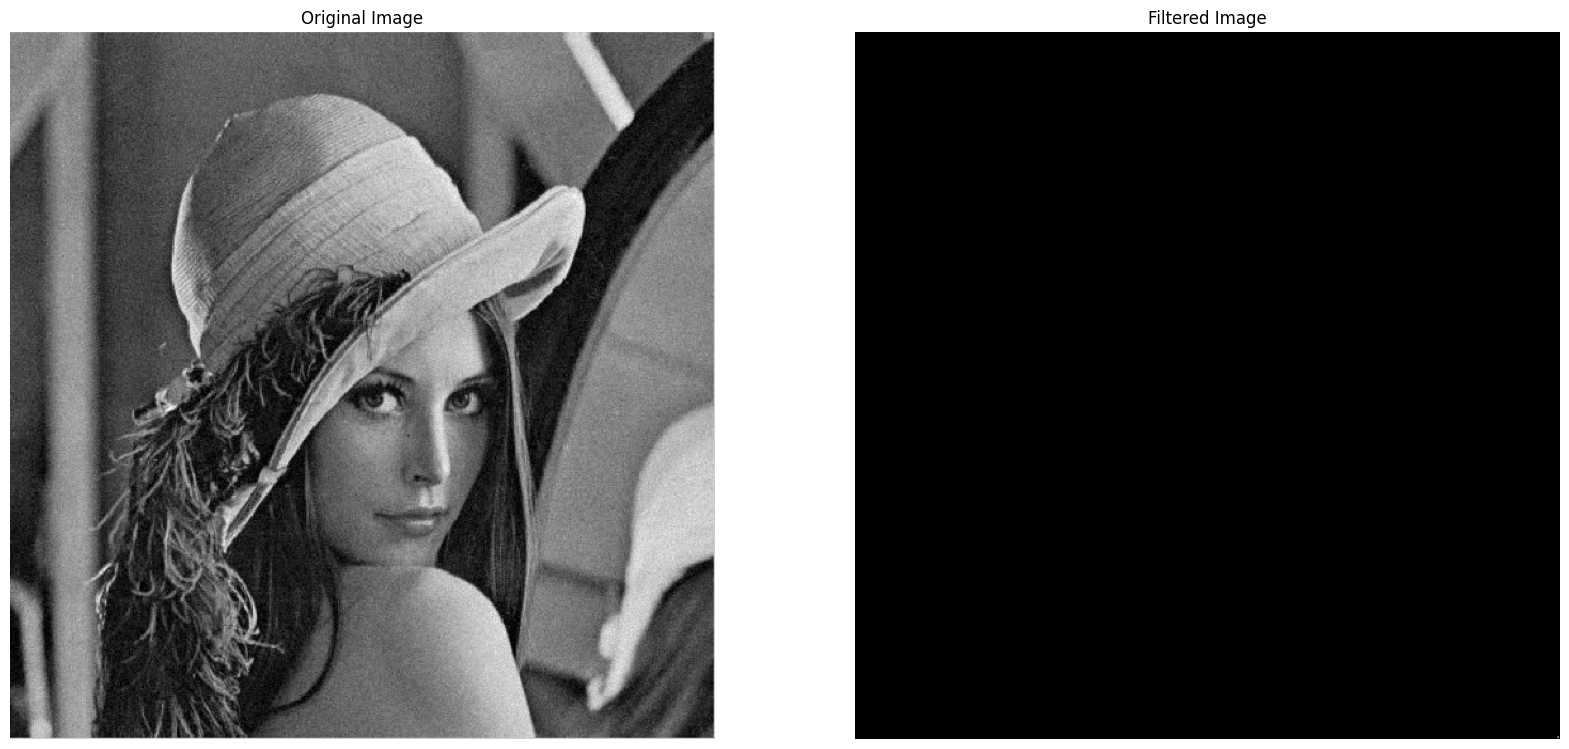

In [7]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(gray_img,cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(output_img,cmap='gray')
plt.title('Filtered Image')
plt.axis('off')
plt.imshow(output_img,cmap='gray')
plt.show()